Dataset structure explored.
Found 3383 total images.

Image counts per class:
class
0    2225
1    1158
Name: count, dtype: int64


C:\Users\User1\AppData\Local\Temp\ipykernel_15996\353113725.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


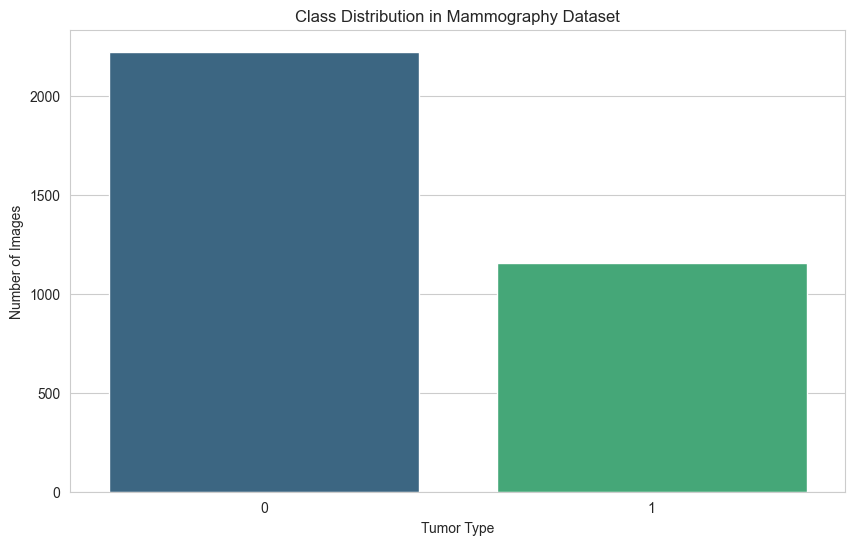

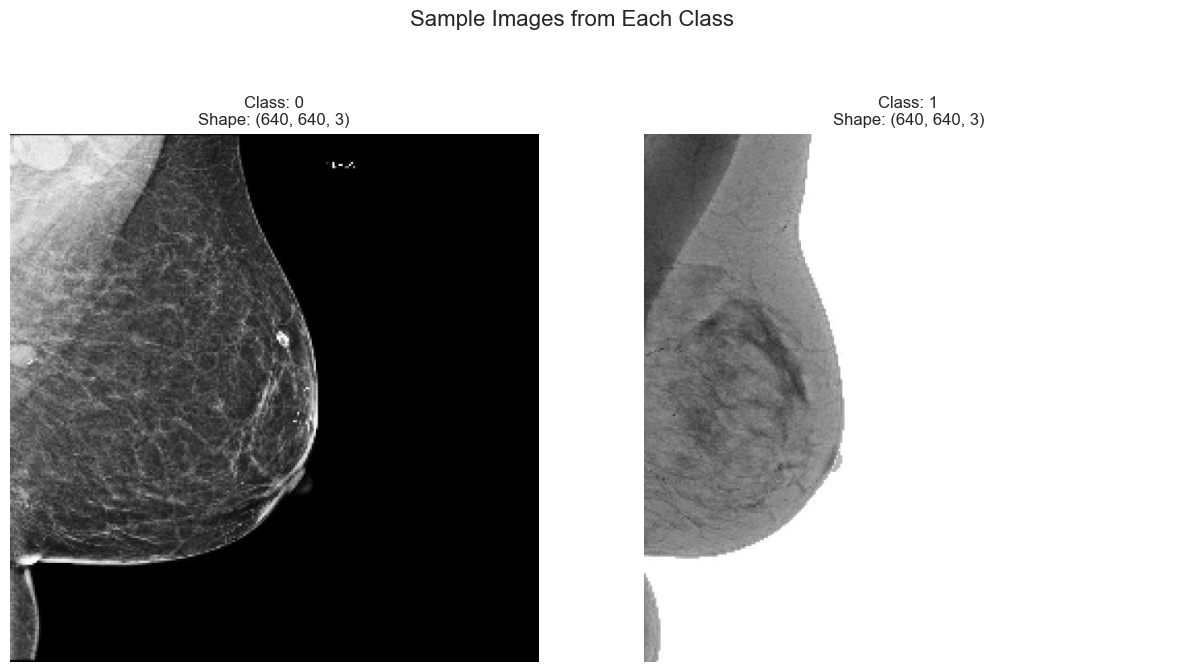

In [1]:
# ----------------------------------------------------------------------
# 1. Breast Cancer Mammography - Data Exploration
# ----------------------------------------------------------------------
# Objective: This script is for the initial exploration of the Breast
# Tumor Mammography Dataset. The goals are to:
# 1. Understand the dataset's structure and class distribution.
# 2. Load and visualize sample images from each class.
# 3. Confirm the image properties (dimensions, color channels).
# ----------------------------------------------------------------------

# ### Step 1: Import Libraries
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent style for plots
sns.set_style("whitegrid")

# ### Step 2: Define Data Path and Explore Structure
# We need to point to the directory where the dataset is stored. The dataset is
# expected to have subdirectories for each class (e.g., 'benign', 'malignant').

# IMPORTANT: Update this path to where you have stored the dataset
# Use a raw string (r'...') or forward slashes to avoid Python treating backslashes as escapes
DATA_DIR = r'C:\Users\User1\Innovators\data'

image_counts = {}
image_paths = []

# Walk through the directory to find image files
for subdir, dirs, files in os.walk(DATA_DIR):
    # Get the class name from the subdirectory name
    class_name = os.path.basename(subdir)

    # Filter for image files (e.g., .png, .jpg)
    image_files = [f for f in files if f.endswith(('.png', '.jpg', '.jpeg'))]

    if image_files:
        image_counts[class_name] = len(image_files)
        for f in image_files:
            image_paths.append({
                'class': class_name,
                'path': os.path.join(subdir, f)
            })

df_paths = pd.DataFrame(image_paths)

print("Dataset structure explored.")
print(f"Found {df_paths.shape[0]} total images.")


# ### Step 3: Analyze Class Distribution
# Understanding if the dataset is balanced is crucial. An imbalanced dataset can bias the model.

class_counts = df_paths['class'].value_counts()
print("\nImage counts per class:")
print(class_counts)

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution in Mammography Dataset')
plt.xlabel('Tumor Type')
plt.ylabel('Number of Images')
plt.show()


# ### Step 4: Visualize Sample Images
# Let's load and display one sample image from each class to visually inspect the data.

def show_sample_images(df):
    plt.figure(figsize=(15, 8))
    unique_classes = df['class'].unique()

    for i, class_name in enumerate(unique_classes):
        # Get a random sample path from the current class
        sample_path = df[df['class'] == class_name].sample(1).iloc[0]['path']

        # Load the image using OpenCV
        # cv2.imread loads in BGR format, so we convert to RGB for matplotlib
        img = cv2.imread(sample_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Display the image
        ax = plt.subplot(1, len(unique_classes), i + 1)
        plt.imshow(img_rgb)
        plt.title(f'Class: {class_name}\nShape: {img.shape}')
        plt.axis('off')

    plt.suptitle('Sample Images from Each Class', fontsize=16)
    plt.show()

# Run the function to display images
show_sample_images(df_paths)

# ----------------------------------------------------------------------
# ### Initial Findings
# ----------------------------------------------------------------------
# 1.  Class Balance: The bar chart shows the distribution of images across the classes.
#     We need to check if there is a significant imbalance that might require
#     techniques like oversampling the minority class.
# 2.  Image Dimensions: The sample images confirm the dimensions (e.g., 640x640)
#     and that they are color images (3 channels). Our model's input layer must
#     match these dimensions.
# 3.  Next Steps: The data appears suitable for a CNN. The next step will be to
#     create a data preprocessing pipeline to normalize and augment these images for training.
# ----------------------------------------------------------------------